In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
use_cols = [
    'Start_Time', 'Start_Lat', 'Start_Lng', 'Severity',
    'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Junction',
    'Traffic_Signal'
]
df = pd.read_csv('US_Accidents_March23.csv', usecols=use_cols, nrows=500000, parse_dates=['Start_Time'])

In [5]:
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

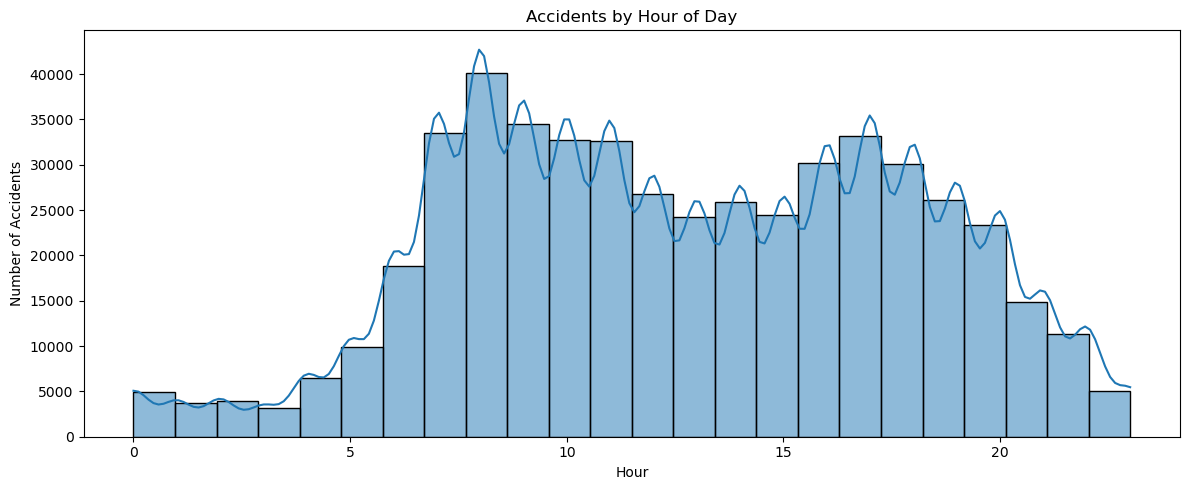

In [6]:
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(12, 5))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

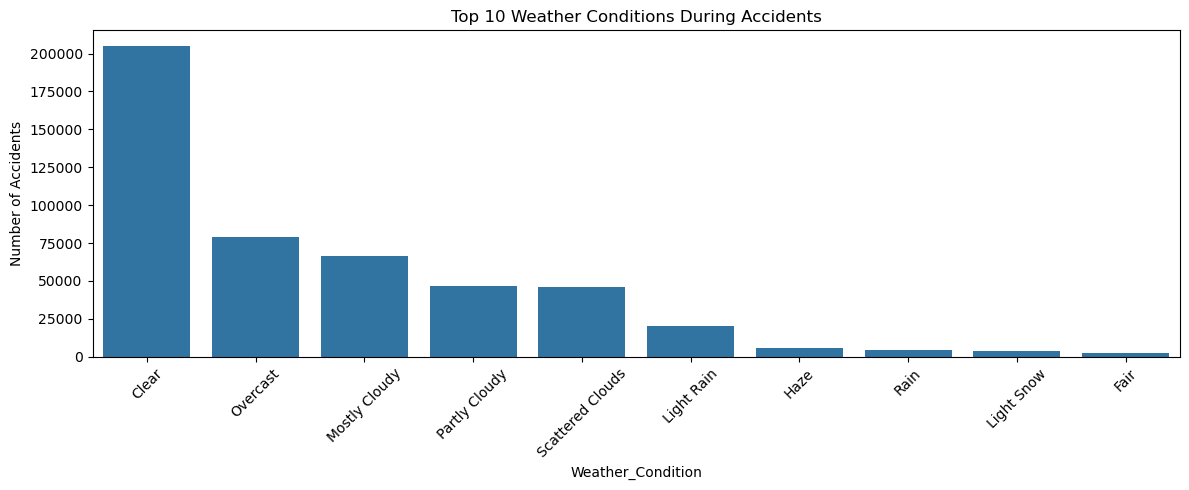

In [7]:
plt.figure(figsize=(12, 5))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values)
plt.title('Top 10 Weather Conditions During Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']
road_data = df[road_features].sum().sort_values(ascending=False)

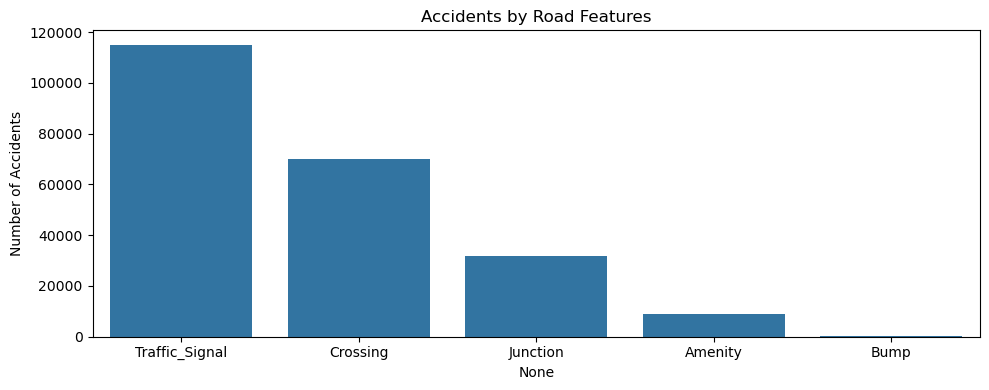

In [9]:
plt.figure(figsize=(10, 4))
sns.barplot(x=road_data.index, y=road_data.values)
plt.title('Accidents by Road Features')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

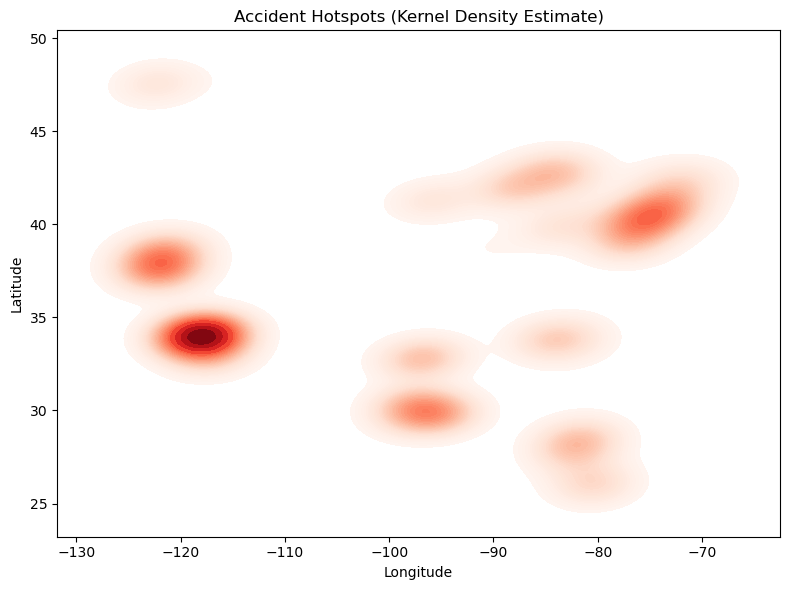

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# take a manageable random sample (~100k rows is plenty for a hotspot map)
sample = df.sample(n=100_000, random_state=42)

plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=sample['Start_Lng'], 
    y=sample['Start_Lat'],
    cmap="Reds",
    fill=True,
    bw_adjust=1.0,   # wider bandwidth → fewer computations
    levels=40,       # fewer contour levels
    thresh=0.05
)
plt.title('Accident Hotspots (Kernel Density Estimate)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

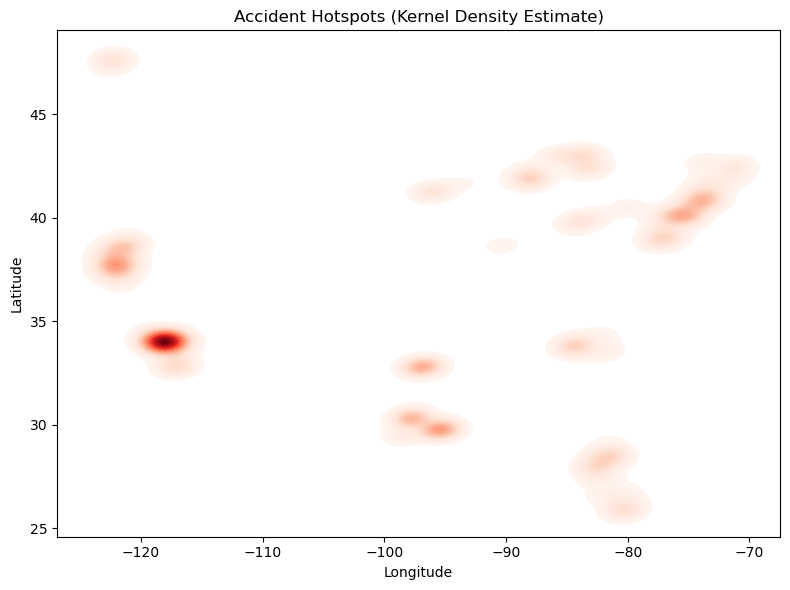

In [11]:
plt.figure(figsize=(8, 6)) 
sns.kdeplot( x=df['Start_Lng'], y=df['Start_Lat'], 
            cmap="Reds", fill=True, bw_adjust=0.5, levels=100, thresh=0.05 
)  
plt.title('Accident Hotspots (Kernel Density Estimate)')
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()